<a href="https://colab.research.google.com/github/bonaerges/pia/blob/main/TareaDeepLearningKerasconMejoras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import sys

assert sys.version_info >= (3, 7)

In [65]:
from packaging import version
import tensorflow as tf
import tensorflow_datasets as tfds

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.activations import elu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.initializers import HeNormal
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Parte A: Construcción y Entrenamiento Inicial


## Construcción de la Red Neuronal:

  ## 20 capas ocultas, cada una con 100 neuronas.

*   20 capas ocultas, cada una con 100 neuronas

*   Inicialización de Xavier/Glorot.

*   Función de activación ELU.
*   Entrenamiento de la Red:
**   Uso del optimizador Adam.
**   Implementación de la detención temprana.

# Parte B: Integración de Mejoras y Comparación

*   Normalización por Lotes
 Implementación y comparación de la velocidad de convergencia y el impacto en
el tiempo de entrenamiento.


## Implementación y comparación de la velocidad de convergencia y el impacto en el tiempo de entrenamiento.
##Sustitución de Normalización por Lotes con ReLU:

## Uso de la inicialización He.
## Comparación de rendimiento entre configuraciones.

# Parte C: Avanzando en Regularización y Optimización
## Dropout y MC Dropout:
## Implementación de dropout.
## Evaluación con MC dropout sin reentrenamiento.
## Análisis de los efectos.

###Parte A: Construcción y Entrenamiento Inicial
### Cargar y prepara el dataset SVHN (Parte A, paso 1)

In [67]:
def load_data():
    (train_data, test_data), ds_info = tfds.load(
        'svhn_cropped',
        split=['train', 'test'],
        as_supervised=True,
        with_info=True,
        batch_size=-1
    )
    return train_data, test_data, ds_info

## Cargar y preparar datos

In [68]:
train_data, test_data, ds_info = load_data()

### Preprocesar los datos (Parte A, paso 1)

In [69]:
def preprocess(data, info):
    x, y = data
    x = tf.image.convert_image_dtype(x, tf.float32)
    y = tf.one_hot(y, depth=info.features['label'].num_classes)
    return x, y

In [70]:
train_data = preprocess(train_data, ds_info)
test_data = preprocess(test_data, ds_info)

### Construir el modelo inicial con Xavier/Glorot y ELU (Parte A, paso 1 y 2)
### 20 capas ocultas, cada una con 100 neuronas

In [71]:
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, activation=elu, kernel_initializer=GlorotUniform()))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Construir y entrenar el modelo inicial, y  entrenamiento inicial (Parte A)


In [72]:
model = build_model(train_data[0].shape[1:], ds_info.features['label'].num_classes)

 # Compilar y entrenar el modelo (Parte A, paso 2)

In [73]:
def compile_and_train(model, train_data, val_data, epochs=50):
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(train_data[0], train_data[1], epochs=epochs,
                        validation_data=val_data, callbacks=[early_stopping])
    return history

In [74]:
history = compile_and_train(model, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 49s 16ms/step - loss: 2.2471 - accuracy: 0.1859 - val_loss: 2.2257 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 32s 14ms/step - loss: 2.2400 - accuracy: 0.1883 - val_loss: 2.2252 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 30s 13ms/step - loss: 2.2393 - accuracy: 0.1887 - val_loss: 2.2262 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 29s 13ms/step - loss: 2.2378 - accuracy: 0.1892 - val_loss: 2.2259 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 45s 20ms/step - loss: 2.2381 - accuracy: 0.1890 - val_loss: 2.2253 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 29s 13ms/step - loss: 2.2384 - accuracy: 0.1886 - val_loss: 2.2273 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 30s 13ms/step - loss: 2.2375 - accuracy: 0.1890 - val_loss: 2.2338 -

### Construir y entrenar el modelo con normalización por lotes
### Función para construir el modelo con normalización por lotes (Parte B, paso 1)

In [75]:
def build_model_with_batchnorm(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, kernel_initializer=GlorotUniform()))
        model.add(BatchNormalization())
        model.add(Activation('elu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [76]:
model_bn = build_model_with_batchnorm(train_data[0].shape[1:], ds_info.features['label'].num_classes)

### Mejora con batch normalization (Parte B, paso 1)

In [77]:
history_bn = compile_and_train(model_bn, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 53s 18ms/step - loss: 1.5746 - accuracy: 0.4767 - val_loss: 1.4514 - val_accuracy: 0.5498
Epoch 2/50
2290/2290 [==============================] - 44s 19ms/step - loss: 1.2860 - accuracy: 0.5959 - val_loss: 1.8966 - val_accuracy: 0.4359
Epoch 3/50
2290/2290 [==============================] - 57s 25ms/step - loss: 1.1876 - accuracy: 0.6313 - val_loss: 1.3488 - val_accuracy: 0.5682
Epoch 4/50
2290/2290 [==============================] - 45s 20ms/step - loss: 1.1033 - accuracy: 0.6601 - val_loss: 1.2102 - val_accuracy: 0.6182
Epoch 5/50
2290/2290 [==============================] - 44s 19ms/step - loss: 1.0354 - accuracy: 0.6801 - val_loss: 1.3642 - val_accuracy: 0.5705
Epoch 6/50
2290/2290 [==============================] - 44s 19ms/step - loss: 0.9907 - accuracy: 0.6935 - val_loss: 1.0727 - val_accuracy: 0.6642
Epoch 7/50
2290/2290 [==============================] - 42s 18ms/step - loss: 0.9455 - accuracy: 0.7086 - val_loss: 1.0336 -

### Función para construir el modelo con ReLU y He (Parte B, paso 2)
### 20 capas ocultas, cada una con 100 neuronas

In [78]:
def build_model_with_relu_he(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, kernel_initializer=HeNormal()))
        model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Construir y entrenar el modelo con ReLU y He

In [79]:
model_relu_he = build_model_with_relu_he(train_data[0].shape[1:], ds_info.features['label'].num_classes)

In [80]:
history_relu_he = compile_and_train(model_relu_he, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 43s 17ms/step - loss: 2.2412 - accuracy: 0.1882 - val_loss: 2.2268 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 30s 13ms/step - loss: 2.2376 - accuracy: 0.1892 - val_loss: 2.2241 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 28s 12ms/step - loss: 2.2373 - accuracy: 0.1892 - val_loss: 2.2252 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 28s 12ms/step - loss: 2.2371 - accuracy: 0.1892 - val_loss: 2.2253 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 28s 12ms/step - loss: 2.2370 - accuracy: 0.1892 - val_loss: 2.2250 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 31s 13ms/step - loss: 2.2371 - accuracy: 0.1892 - val_loss: 2.2235 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 28s 12ms/step - loss: 2.2369 - accuracy: 0.1892 - val_loss: 2.2251 -

### Imprimir las métricas del entrenamiento para comparación

In [81]:
print("Historial inicial:", history.history)
print("Historial con Normalización por Lotes:", history_bn.history)
print("Historial con ReLU y He:", history_relu_he.history)

Historial inicial: {'loss': [2.2470645904541016, 2.240004301071167, 2.239251136779785, 2.237804412841797, 2.238147735595703, 2.238429546356201, 2.237473964691162], 'accuracy': [0.1858525425195694, 0.18829600512981415, 0.18867821991443634, 0.18921059370040894, 0.18899217247962952, 0.18860995769500732, 0.1890331357717514], 'val_loss': [2.2256710529327393, 2.2251524925231934, 2.2261717319488525, 2.2258667945861816, 2.225285530090332, 2.227325201034546, 2.2338318824768066], 'val_accuracy': [0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.15957283973693848]}
Historial con Normalización por Lotes: {'loss': [1.5746266841888428, 1.286011815071106, 1.1875922679901123, 1.1032973527908325, 1.035435438156128, 0.990683913230896, 0.9455462694168091, 0.9056159853935242, 0.8738243579864502, 0.8552001118659973, 0.8250771164894104, 0.80800461769104, 0.7820078730583191, 0.7643492221832275, 0.7501761317253113, 0.73239850997924

## Parte C: Avanzando en Regularización y Optimización
* Introducir Dropout

In [82]:
from tensorflow.keras.layers import Dropout

### Función para construir el modelo con dropout (Parte C, paso 1)

In [83]:
def build_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, activation='elu', kernel_initializer=GlorotUniform()))
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Función para realizar predicciones utilizando MC Dropout (Parte C, paso 2)

In [84]:
def mc_dropout_predict(model, data, num_samples=100):
    predictions = [model(data, training=True) for _ in range(num_samples)]
    return tf.reduce_mean(predictions, axis=0)

### Construir y entrenar el modelo con dropout



In [85]:
model_dropout = build_model_with_dropout(train_data[0].shape[1:], ds_info.features['label'].num_classes)
history_dropout = compile_and_train(model_dropout, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 40s 16ms/step - loss: 2.4957 - accuracy: 0.1505 - val_loss: 2.2276 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 33s 14ms/step - loss: 2.2511 - accuracy: 0.1833 - val_loss: 2.2240 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 34s 15ms/step - loss: 2.2487 - accuracy: 0.1845 - val_loss: 2.2278 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 35s 15ms/step - loss: 2.2504 - accuracy: 0.1835 - val_loss: 2.2292 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 33s 14ms/step - loss: 2.2503 - accuracy: 0.1842 - val_loss: 2.2272 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 34s 15ms/step - loss: 2.2504 - accuracy: 0.1838 - val_loss: 2.2304 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 34s 15ms/step - loss: 2.2518 - accuracy: 0.1825 - val_loss: 2.2325 -

### Utilizar MC Dropout para evaluar el modelo en el conjunto de test,  Evluación con MC Dropout (Parte C, paso 2)

In [86]:
mc_predictions = mc_dropout_predict(model_dropout, test_data[0])


###  Calcular la precisión final con MC Dropout

In [87]:
mc_accuracy = tf.metrics.categorical_accuracy(test_data[1], mc_predictions)
mc_accuracy_mean = tf.reduce_mean(mc_accuracy)

### Imprimir las métricas

In [88]:
print("Historial con Dropout:", history_dropout.history)
print("Precisión media con MC Dropout:", mc_accuracy_mean.numpy())

Historial con Dropout: {'loss': [2.4957284927368164, 2.251149892807007, 2.248713254928589, 2.25042724609375, 2.250253438949585, 2.2503561973571777, 2.2518069744110107], 'accuracy': [0.1504839062690735, 0.18325893580913544, 0.18447384238243103, 0.18349099159240723, 0.18417352437973022, 0.18383225798606873, 0.1825491040945053], 'val_loss': [2.227567672729492, 2.2240488529205322, 2.227825164794922, 2.22918701171875, 2.2272250652313232, 2.2303669452667236, 2.2324516773223877], 'val_accuracy': [0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044]}
Precisión media con MC Dropout: 0.1958743


## Gráficos de las Curvas de Entrenamiento y Validación

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [90]:
def plot_history(histories, titles):
    plt.figure(figsize=(14, 5))
    for i, (history, title) in enumerate(zip(histories, titles)):
        plt.subplot(1, len(histories), i+1)
        plt.plot(history.history['accuracy'], label='train_accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title('Model Accuracy - ' + title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Suponiendo que history, history_bn, history_relu_he, history_dropout son los históricos obtenidos de cada modelo

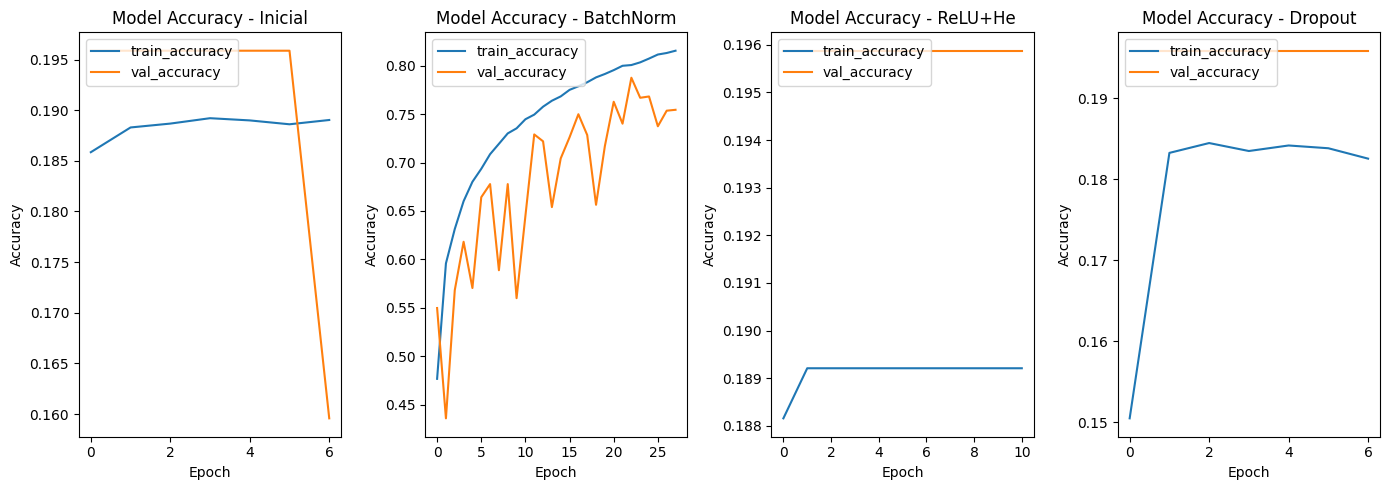

In [91]:
plot_history([history, history_bn, history_relu_he, history_dropout],
             ['Inicial', 'BatchNorm', 'ReLU+He', 'Dropout'])

### Sugerencias para Futuras Exploraciones:
### Optimización de Hiperparámetros

In [92]:
!pip install keras-tuner --upgrade

In [1]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch

ModuleNotFoundError: No module named 'kerastuner'

### Funcion

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))  # Ajusta según la forma de tus datos de entrada

    # Permite a Keras Tuner decidir el número de neuronas en las primeras dos capas Dense
    for i in range(2):  # Dos capas densas
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))  # Ajusta según el número de clases

    # Permite a Keras Tuner decidir la tasa de aprendizaje
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy'])

    return model

### # Crear el tuner y realizar la búsqueda de hiperparámetros

In [95]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Número máximo de configuraciones de prueba
    executions_per_trial=2,  # Número de modelos que se entrenan por prueba
    directory='logs',  # Directorio para almacenar logs
    project_name='keras_tuner_demo')

Reloading Tuner from logs/keras_tuner_demo/tuner0.json


In [ ]:
# Suponiendo que x_train y y_train están definidos
tuner.search(tra, y_train, epochs=10, validation_split=0.2)

# Obtiene el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

### SVHN con CNN

In [95]:
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convertir a float y escalar [0, 1]
    label = tf.one_hot(label, depth=ds_info.features['label'].num_classes)
    return image, label

### Aplicar el preprocesamiento de datos



In [ ]:
train_data = train_data.map(preprocess).cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

### Construir el modelo CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Entrenar el modelo

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

### Evaluar el modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print("Test accuracy:", test_acc)


### Visualización

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

###  Técnicas Avanzadas de Regularización: Regularizaciones más avanzadas como L1/L2 o métodos basados en el ruido como Cutout.

In [ ]:
 Avanzadas de Regularización: Explorar regularizaciones más avanzadas como L1/L2 o métodos basados en el ruido como Cutout.

In [ ]:
from tensorflow.keras.regularizers import l1_l2

###  Implementar Cutout

In [ ]:
def cutout(img, mask_size, p=0.5):
    if tf.random.uniform(()) > p:
        return img
    mask_size_half = mask_size // 2
    h = tf.shape(img)[0]
    w = tf.shape(img)[1]
    center = (tf.random.uniform(shape=[], minval=0, maxval=h),
              tf.random.uniform(shape=[], minval=0, maxval=w))

    mask = tf.zeros((h, w, 3))
    mask = tf.tensor_scatter_nd_update(mask,
                                       indices=[[center[0], center[1]]],
                                       updates=[[1.0]])

    mask = tf.image.resize_with_crop_or_pad(mask, h + mask_size, w + mask_size)
    mask = tf.image.crop_to_bounding_box(mask, mask_size_half, mask_size_half, h, w)
    img = tf.where(tf.equal(mask, 0), tf.zeros_like(img), img)
    return img

# Apply Cutout as a data augmentation step
def augment(image, label):
    image = cutout(image, mask_size=16)  # You can adjust the mask size
    return image, label

train_data = train_data.map(augment)

### Construir el modelo con L1/L2 Regularization


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Entrenar el modelo

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

### Evaluar el modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print("Test accuracy:", test_acc)